In [18]:
# remember to run in anaconda
# https://code.visualstudio.com/docs/datascience/data-science-tutorial
# conda config --append channels conda-forge
# conda create -n myenv python=3.10 pandas jupyter seaborn scikit-learn keras tensorflow numpy statsmodels
# conda activate myenv

# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_style("white")

In [19]:
advertising = pd.read_csv('../Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


notice `usecols` that selects a `list` with `range` from (1,12)

Notice the use of `map` below
1. create a column `student2`
2. iterate only the `Student` column, where it shows `No` enter 0 in the respective column
3. else, enter 1 (i.e. corresponding to `Yes`)

In [20]:
credit = pd.read_csv('../Data/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
# need to print to show the head()
print(credit.head(3))

    Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   

   Ethnicity  Balance  Student2  
0  Caucasian      333         0  
1      Asian      903         1  
2      Asian      580         0  


### Figure 3.1 - Least squares fit

(0.0, 28.27)

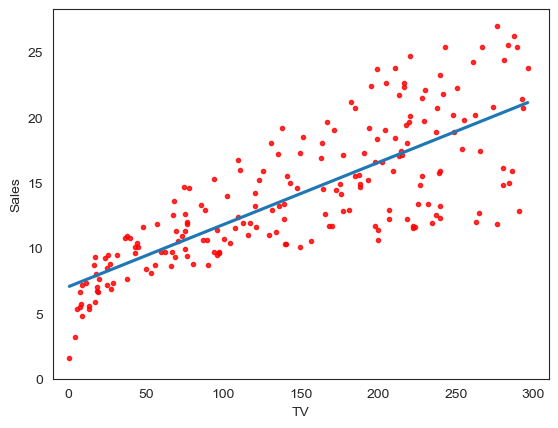

In [21]:
sns.regplot(x=advertising.TV, y=advertising.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
#setting limit bounds
plt.xlim(-10,310) 
plt.ylim(ymin=0) 

In [22]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
# we need to reshape to correspond to y
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_) #b0
print(regr.coef_) #b1

[  83.0575 -102.5425 -129.8425    4.4575   33.7575 -138.3425  -89.5425
  -26.8425 -138.4425   52.7575  -80.9425   67.6575 -123.2425  -49.5425
   57.0575   48.3575  -79.2425  134.3575  -77.8425    0.2575   71.3575
   90.3575 -133.8425   81.2575  -84.7425  115.8575   -4.1425   93.0575
  101.7575  -76.4425  145.8575  -34.1425  -49.8425  118.5575  -51.3425
  143.6575  119.8575  -72.3425 -103.9425   80.9575   55.4575   29.9575
  146.5575   59.8575 -121.9425   28.0575  -57.3425   92.8575   80.1575
  -80.1425   52.7575  -46.6425   69.3575   35.5575  115.6575   51.8575
 -139.7425  -10.8425   63.7575   63.6575  -93.5425  114.2575   92.2575
  -44.3425  -15.9425  -78.0425 -115.5425   -7.7425   90.3575   69.7575
   52.0575  -37.2425 -120.2425  -17.6425   66.3575 -130.1425 -119.5425
  -26.5425 -141.6425  -31.0425  -70.6425   92.7575  -71.7425  -78.6425
   66.4575   46.1575  -70.7425  -36.3425  -58.7425  -37.2425  -12.7425
 -118.4425   70.6575  103.8575  -39.6425   16.2575   50.5575   37.8575
  142.

Notice the use of `scale` from sk_learn

        z = (x - u) / s

        where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False

        https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

`scale` returns a simple array, which we need to "shape" for use with `y`

Notice the use of `reshape` from numpy

1. the first -1 is to flatten the data into a single array
2. the next 1 is to verticalize into an array of arrays , this is to match the shape of `y`

